In [45]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Data

In [46]:
df_train=pd.read_csv('https://raw.githubusercontent.com/KISHOREVD/Machine_learning-assigments/main/Boston_house_train.csv')
df_train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


### Data Cleaning

#### Check for Missing Data

In [25]:
df_train.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Data Visualization

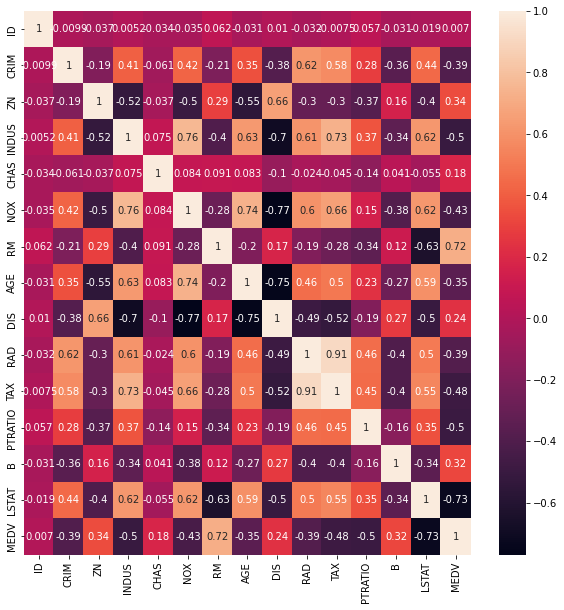

In [26]:
# Heatmap
corr_matrix = df_train.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

## Data Preprocessing


### Splitting Data

In [27]:
df_train.drop(["MEDV"],axis=1,inplace=True)

In [28]:
y_train=df_train.iloc[:,-1].values
X_train=df_train.iloc[:,:-1].values

In [29]:
df_test=pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Machine_learning-assigments/main/Boston_house_test.csv")

In [30]:
y_test=df_test.iloc[:,-1].values
X_test=df_test.iloc[:,:-1].values

### Select and Train a Model


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred_test = lin_reg.predict(X_test)
r2_test = r2_score(y_test,lin_pred_test)
print('R squared of Linear Regression for Test Date :', r2_test)


R squared of Linear Regression for Test Date : 0.4824298621387696


###  Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0000000000000002


### Fit the Model after Scaling 

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
lin_pred_test = lin_reg.predict(X_test_scaled)
lin_pred_train = lin_reg.predict(X_train_scaled)
r2_test = r2_score(y_test,lin_pred_test)
print('R squared of Linear Regression for Test Date :', r2_test)

R squared of Linear Regression for Test Date : 0.4824298621387684


### Adding Polynomial Features

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

poly_fea = PolynomialFeatures(degree=2)
X_poly_train  = poly_fea.fit_transform(X_train)
X_poly_test  = poly_fea.fit_transform(X_test)
lin_reg.fit(X_poly_train,y_train)
lin_pred_test = lin_reg.predict(X_poly_test)
r2_test = r2_score(y_test,lin_pred_test)
print('R squared of Linear Regression for Test Date :', r2_test)

R squared of Linear Regression for Test Date : 0.42533961905283824


In [35]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0000000000000002


### Fit the Model after Scaling and Adding  Polynomial Features

In [36]:
lin_reg.fit(X_train_scaled,y_train)
lin_pred_test = lin_reg.predict(X_test_scaled)
r2_test = r2_score(y_test,lin_pred_test)
print('R squared of Linear Regression for Test Date :', r2_test)

R squared of Linear Regression for Test Date : 0.4554817088298406


### Regularization techniques

#### Ridge regressor


In [37]:
from sklearn.linear_model import Ridge

ridge =  Ridge(alpha = 0.05)
ridge.fit(X_train_scaled, y_train)
ridge_pred_test = ridge.predict(X_test_scaled)
n_test = r2_score(y_test,ridge_pred_test)
print('R Squared of test dataset: {}'.format(n_test))

R Squared of test dataset: 0.4913510735573664


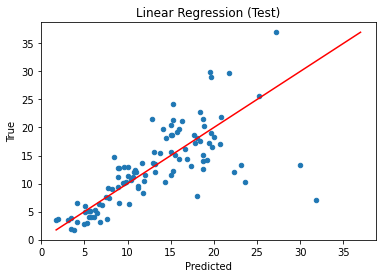

In [38]:
plt.scatter(ridge_pred_test, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Test)")
plt.show()

In [39]:
from sklearn.linear_model import Lasso

Las =  Ridge(alpha = 0.5)
Las.fit(X_train_scaled, y_train)
Las_pred_test = Las.predict(X_test_scaled)
n_test = r2_score(y_test,Las_pred_test)
print('R Squared of test dataset: {}'.format(n_test))

R Squared of test dataset: 0.4882379668954586


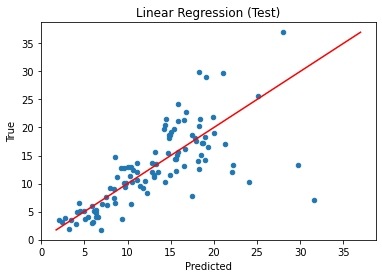

In [40]:
plt.scatter(Las_pred_test, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Test)")
plt.show()

In [41]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=5)  # finding top 5 features
sfs.fit(X_train, y_train)
print(list(zip(df_train.columns,sfs.get_support())))

# we can try our model with CRIM,RM,AGE,RAD,B columns 

[('ID', False), ('CRIM', True), ('ZN', False), ('INDUS', False), ('CHAS', False), ('NOX', False), ('RM', True), ('AGE', True), ('DIS', False), ('RAD', True), ('TAX', False), ('PTRATIO', False), ('B', True)]


In [42]:
X_train=df_train[["CRIM","RM","AGE","RAD","B"]]
X_test=df_test[["CRIM","RM","AGE","RAD","B"]]

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred_test = lin_reg.predict(X_test)
r2_test = r2_score(y_test,lin_pred_test)
print('R squared of Linear Regression for Test Date :', r2_test)

R squared of Linear Regression for Test Date : 0.5008216641181024


In [43]:
from sklearn.linear_model import Ridge
ridge =  Ridge(alpha = 0.05)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)
n_test = r2_score(y_test,ridge_pred_test)
print('R Squared of test dataset: {}'.format(n_test))

R Squared of test dataset: 0.5008752802771282
